In [19]:
#imports
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd


1.Function that translates a string of nucleotides to amino acids 

In [2]:
def get_sequences_from_file(fasta_fn): #this function is to extract sequences from the input file
    sequence_data_dict = {}  #initialize an empty dictionary to store sequences with their headers
    for record in SeqIO.parse(fasta_fn, "fasta"): #takes every entry in the fasta file
        description = record.description.split() #the contents of each header are split
        species_name = description[1] + " " + description[2] # the first and second index of the header denotes the genus and species
        sequence_data_dict[species_name] = record.seq # the species name is stored to a dictionary
    return(sequence_data_dict) #returns the dictionary as output

In [14]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]  # Extract codon table
    aa_seq_string = ''  # Initialize an empty string to store the translated AA
    # for loop through every 3rd position in string_nucleotides to get codons
    for position in range(0, len(string_nucleotides) - 2, 3):
        codon = string_nucleotides[position:position+3]
        if codon in mito_table.stop_codons:
            break  # Stop translation at the first stop codon
        aa = mito_table.forward_table.get(codon, 'X')  # Retrieve an AA; 'X' if unknown
        aa_seq_string += aa  
    return aa_seq_string

In [29]:
#we shall use the in-built biopython tranlate function
def faster_translate(string_nucleotides): 
    data=[]
    for species, seq in sequence_data_dict.items():
        my_seq = Seq(str(seq))
        translated = my_seq.translate()  # Convert Seq object to string and translate
        data.append({"species": species, "protein_sequence": translated})

In [21]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [22]:
def compute_molecular_weight(aa_seq):
    aa_seq=str(aa_seq) #ProtParam functions may require aa_seq to be a string.
    aa_seq=aa_seq.replace('*','') #to remove stop codon if any
    weight=ProteinAnalysis(aa_seq).molecular_weight()
    return weight

In [25]:
from Bio.SeqUtils import gc_fraction

In [46]:
def gc_content(seq):
    return gc_fraction(str(seq)) * 100

Main function

In [ ]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)


In [34]:
penguins_df.head()

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25


In [38]:
species_list

['Aptenodytes forsteri',
 'Aptenodytes patagonicus',
 'Eudyptes chrysocome',
 'Eudyptes chrysolophus',
 'Eudyptes sclateri',
 'Eudyptula minor',
 'Pygoscelis adeliae',
 'Pygoscelis antarctica',
 'Pygoscelis papua',
 'Spheniscus demersus',
 'Spheniscus humboldti',
 'Spheniscus magellanicus']

In [39]:
import numpy as np

penguins_df["molecular_weight"] = np.nan
penguins_df["gc_content"] = np.nan

In [40]:
penguins_df.head()

,species,mass,molecular_weight,gc_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN


In [41]:
sequence_dict = dict(cytb_seqs) 

In [54]:
for species_name, nucleotide_seq in cytb_seqs.items():
    aa_seq = translate_function(nucleotide_seq)
    mol_weight = compute_molecular_weight(aa_seq)
    gc = gc_content(nucleotide_seq)
    penguins_df.loc[penguins_df["species"] == species_name, "molecular_weight"] = mol_weight
    penguins_df.loc[penguins_df["species"] == species_name, "gc_content"] = gc

In [48]:
penguins_df.head()

,species,mass,molecular_weight,gc_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Aptenodytes forsteri'),
  Text(1, 0, 'Aptenodytes patagonicus'),
  Text(2, 0, 'Eudyptes chrysocome'),
  Text(3, 0, 'Eudyptes chrysolophus'),
  Text(4, 0, 'Eudyptes sclateri'),
  Text(5, 0, 'Eudyptula minor'),
  Text(6, 0, 'Pygoscelis adeliae'),
  Text(7, 0, 'Pygoscelis antarctica'),
  Text(8, 0, 'Pygoscelis papua'),
  Text(9, 0, 'Spheniscus demersus'),
  Text(10, 0, 'Spheniscus humboldti'),
  Text(11, 0, 'Spheniscus magellanicus')])

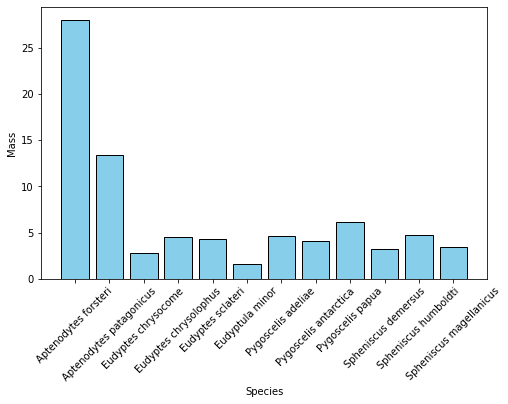

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
mass_by_species = penguins_df.groupby("species")["mass"].mean()
species = mass_by_species.index
mass = mass_by_species.values
plt.bar(species, mass, color="", edgecolor="black")
plt.xlabel("Species")
plt.ylabel("Mass")
plt.xticks(rotation=45)

Q1: What is the smallest penguin species? 

In [56]:
min_mass_species = mass_by_species.idxmin()
min_mass_value = mass_by_species.min()
print(f"Smallest penguin species: {min_mass_species} ({min_mass_value:.2f} g)")

Smallest penguin species: Eudyptula minor (1.60 g)


In [58]:
gc_value = penguins_df[penguins_df["species"] == min_mass_species]["gc_content"].mean()
print(f"Geographical range of smallest species: ({min_mass_species}): {gc_value:.2f}%")

Geographical range of smallest species: (Eudyptula minor): 49.26%


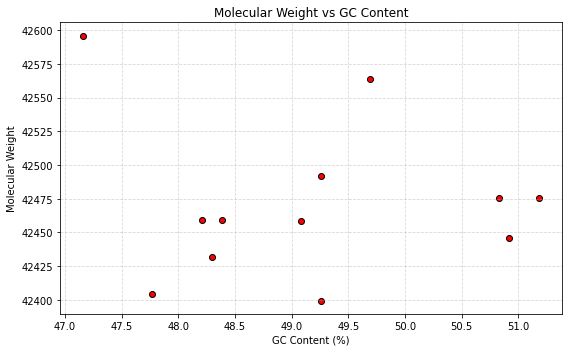

In [60]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(penguins_df['gc_content'], penguins_df['molecular_weight'], color='red', edgecolor='k')
plt.xlabel('GC Content (%)')
plt.ylabel('Molecular Weight')
plt.title('Molecular Weight vs GC Content')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [61]:
## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [62]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)

/scratch/vaish/6329308/ipykernel_518295/3133662156.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='genus', y='gc_content', data=penguins_df, palette='Set2')


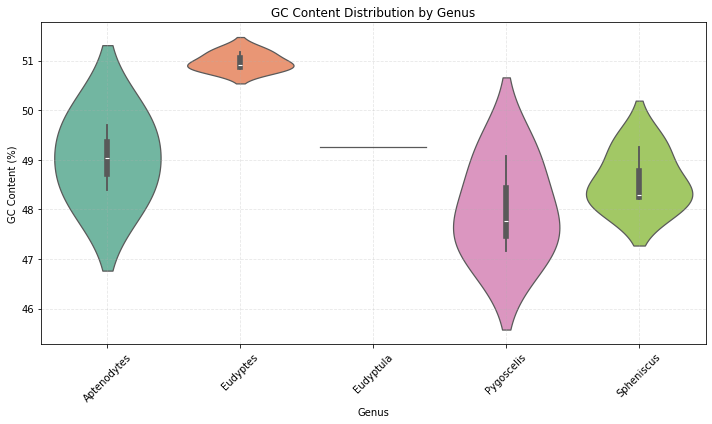

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add genus column
penguins_df['genus'] = penguins_df['species'].apply(lambda x: x.split()[0])

# Plot violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='genus', y='gc_content', data=penguins_df, palette='Set2')
plt.title('GC Content Distribution by Genus')
plt.xlabel('Genus')
plt.ylabel('GC Content (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
